<a href="https://colab.research.google.com/github/ValeriaYashan/Machine-learning/blob/main/Diabetes_aplicando_onehotencoding_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAMOS LIBRERÍAS, INSTALAMOS BIBLIOTECAS

In [ ]:
#Facilita la manipulación, análisis y limpieza de datos mediante estructuras como DataFrames, permitiendo operaciones estadísticas, selección eficiente y gestión de valores nulos.import pandas as pd
!pip install pandas==1.5.3
import pandas as pd

In [ ]:
import numpy as np
#Proporciona arreglos multidimensionales (arrays) y funciones matemáticas optimizadas para realizar operaciones eficientes en dichos arreglos

In [ ]:
import seaborn as sns
#Visualización de datos. simplifica la creación de gráficos estadísticos atractivos e informativos en una sola línea de código(ej.diagramas de caja)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#StringIo proporciona una interfaz para operaciones de entrada/salida en cadenas de texto, permitiendo tratarlas como si fueran archivos.
import io
from io import StringIO

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import sys

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Obtener el nombre del archivo
file_name = next(iter(uploaded))

In [ ]:
# Leer el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

In [ ]:
# Verificar el DataFrame
print(df.head())
print("\nNombres de las columnas:", df.columns)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Nombres de las columnas: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
max_age = df['Age'].max()
print("La mayor edad en el DataFrame es:", max_age)
min_age = df['Age'].min()
print("La menor edad en el DataFrame es:", min_age)

La mayor edad en el DataFrame es: 81
La menor edad en el DataFrame es: 21


PREPARACIÓN DE DATOS
'Outcome' se utiliza como el nombre de la columna que contiene la información sobre si una persona tiene diabetes (1) o no (0). La función drop se utiliza para excluir esa columna del conjunto de características (X), y se guarda en la variable 'y' para representar las etiquetas.

En el ámbito del árbol de decisión y otros modelos de aprendizaje supervisado, 'Outcome' se considera la variable objetivo, y el modelo aprenderá patrones en las otras características (como número de embarazos, presión arterial, etc.) para hacer predicciones sobre esta variable objetivo.

In [ ]:
# Crear conjunto de características (X) excluyendo la columna 'Outcome'
X = df.drop('Outcome', axis=1)

In [ ]:
# Crear variable 'y' con las etiquetas de la columna 'Outcome'
y = df['Outcome']

Voy a agregar Age_Category y luego aplicaré OneHotEncoding

In [ ]:
# Crear una nueva columna 'Age_Category' usando los intervalos dados
bins = [21, 35, 50, 81]
labels = ['21-26', '36-50', '51-82']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
 #Crear una nueva columna 'Age_Category' basada en los intervalos con la mayoría de los positivos de 'Outcome' (1)
positive_outcome_intervals = [20, 30, 40, 50, 60, 70, 80]  # Puedes ajustar estos intervalos según tus datos
df['Age_Category'] = pd.cut(df['Age'], bins=positive_outcome_intervals, right=False)

# Verificar la distribución de 'Outcome' en los nuevos intervalos de edad
outcome_distribution = df.groupby('Age_Category')['Outcome'].value_counts(normalize=True).unstack()
print(outcome_distribution)

# Crear conjunto de características (X) excluyendo la columna 'Outcome'
X = df.drop('Outcome', axis=1)

# Crear variable 'y' con las etiquetas de la columna 'Outcome'
y = df['Outcome']

# Verificar el DataFrame
print(df.head())
print("\nNombres de las columnas:", df.columns)

Outcome              0         1
Age_Category                    
[20, 30)      0.787879  0.212121
[30, 40)      0.539394  0.460606
[40, 50)      0.449153  0.550847
[50, 60)      0.403509  0.596491
[60, 70)      0.724138  0.275862
[70, 80)      0.500000  0.500000
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Category  
0                     0.627   50        1     [50, 60)  
1                     0.351   31        0     [30, 40)  
2                     0.672   32        1     [30, 40)  
3                     0.167   21        0     [20, 30)  
4                 

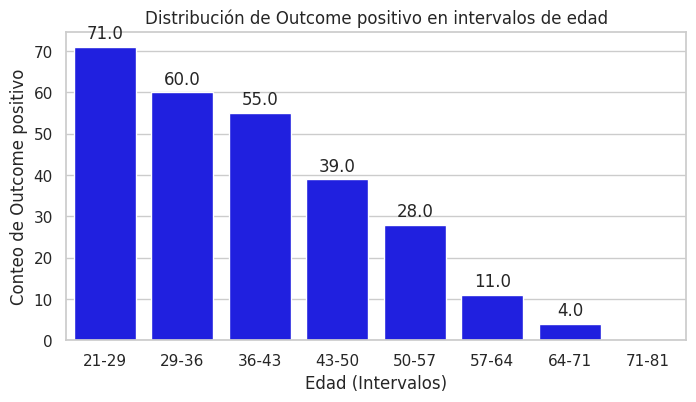

In [ ]:
# Crear intervalos personalizados hasta los 81 años
bins = [21, 29, 36, 43, 50, 57, 64, 71, 81]
labels = ['21-29', '29-36', '36-43', '43-50', '50-57', '57-64', '64-71', '71-81']

# Crear una nueva columna 'Age_Category' usando los intervalos dados
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la distribución de 'Outcome' en los intervalos de edad
outcome_distribution = df.groupby('Age_Category')['Outcome'].value_counts().unstack()

# Graficar la distribución de 'Outcome' en los intervalos de edad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))  # Tamaño más pequeño
ax = sns.barplot(x=outcome_distribution.index, y=outcome_distribution[1], color='blue')

# Agregar etiquetas de recuento en cada barra
for i, count in enumerate(outcome_distribution[1]):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')

# Configurar etiquetas y título
plt.xlabel('Edad (Intervalos)')
plt.ylabel('Conteo de Outcome positivo')
plt.title('Distribución de Outcome positivo en intervalos de edad')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear una nueva columna 'Age_Category' usando los intervalos dados
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Aplicar one-hot encoding a la columna 'Age_Category'
df_encoded = pd.get_dummies(df, columns=['Age_Category'], prefix='Age_Category')

# Convertir las columnas generadas por one-hot encoding a tipo entero
age_category_columns = [col for col in df_encoded.columns if 'Age_Category' in col]
df_encoded[age_category_columns] = df_encoded[age_category_columns].astype(int)

In [ ]:
# Convertir las columnas generadas por one-hot encoding a tipo entero
age_category_columns = pd.get_dummies(df['Age_Category']).columns
df[age_category_columns] = pd.get_dummies(df['Age_Category'])

# Mostrar el DataFrame con las nuevas columnas
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age_Category  21-29  29-36  36-43  \
0                     0.627   50        1        50-57      0      0      0   
1                     0.351   31        0        29-36      0      1      0   
2                     0.672   32        1        29-36      0      1      0   
3                     0.167   21        0        21-29      1      0      0   
4                     2.288   33        1        29-36      0      1      0   

   43-50  50-57  57-64  64-71  71-81  
0      0      1      0      0      0  
1      0      

In [ ]:
# Filtrar el DataFrame para mostrar solo las filas con Outcome 1
df_encoded_outcome_1 = df_encoded[df_encoded['Outcome'] == 1]

# Imprimir las primeras filas del DataFrame filtrado
print(df_encoded_outcome_1.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  Age_Category_21-29  \
0                     0.627   50        1                   0   
2                     0.672   32        1                   0   
4                     2.288   33        1                   0   
6                     0.248   26        1                   1   
8                     0.158   53        1                   0   

   Age_Category_29-36  Age_Category_36-43  Age_Category_43-50  \
0                   0                   0                   0   
2                   1                   0     

<ipython-input-27-835c5184c5cf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outcome.corr()


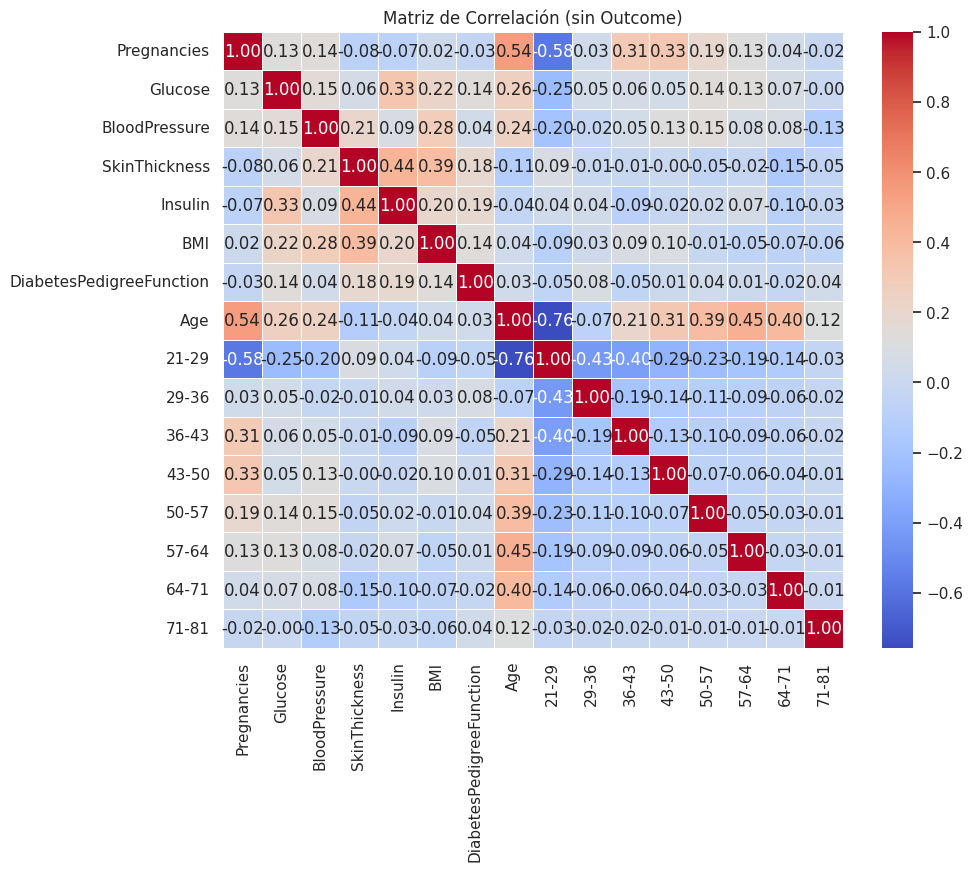

In [ ]:
# Eliminar la columna 'Outcome' antes de calcular la matriz de correlación
df_no_outcome = df.drop('Outcome', axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_no_outcome.corr()

# Crear un mapa de calor en tamaño pequeño
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación (sin Outcome)')
plt.show()

CONSTRUIMOS EL MODELO

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,21-29,29-36,36-43,43-50,50-57,57-64,64-71,71-81
0,6,148,72,35,0,33.6,0.627,50,1,50-57,0,0,0,0,1,0,0,0
1,1,85,66,29,0,26.6,0.351,31,0,29-36,0,1,0,0,0,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,29-36,0,1,0,0,0,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,21-29,1,0,0,0,0,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,29-36,0,1,0,0,0,0,0,0


AGREGAR UNA COLUMNA CALCULADA AL DATASET

In [ ]:
# Agregar una columna calculada: IMC_Categoria
df['IMC_Categoria'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                             labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad I', 'Obesidad II', 'Obesidad III'])

# Muestra el conjunto de datos con la nueva columna
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Age_Category  21-29  29-36  36-43  \
0                       0.627 

<ipython-input-30-13d9f0d7f6b2>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_no_outcome.corr()


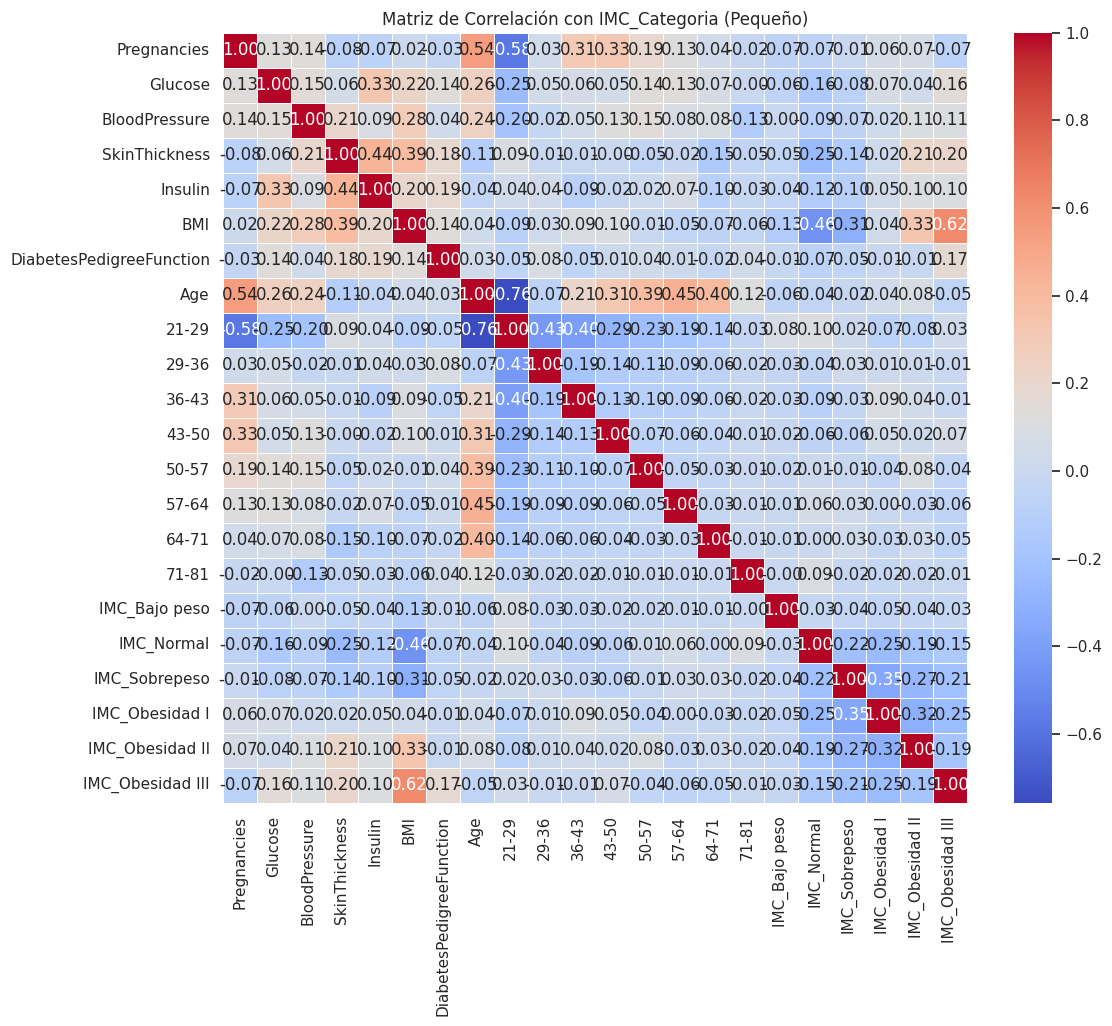

In [ ]:
# Agregar una columna calculada: IMC_Categoria
df['IMC_Categoria'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                             labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad I', 'Obesidad II', 'Obesidad III'])

# Convertir las columnas generadas por one-hot encoding a tipo entero
df_encoded = pd.get_dummies(df, columns=['IMC_Categoria'], prefix='IMC')

# Eliminar la columna 'Outcome' antes de calcular la matriz de correlación
df_no_outcome = df_encoded.drop('Outcome', axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_no_outcome.corr()

# Crear un mapa de calor en tamaño pequeño
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación con IMC_Categoria (Pequeño)')
plt.show()

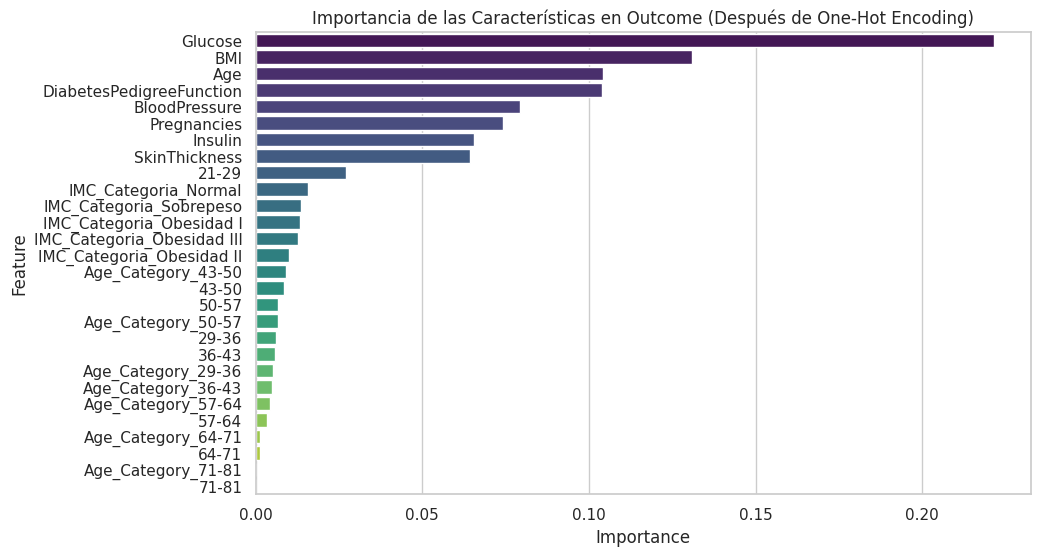

In [ ]:
# Aplicar one-hot encoding a las columnas categóricas, incluidos los intervalos
df_encoded = pd.get_dummies(df, columns=['Age_Category', 'IMC_Categoria'], drop_first=True)

# Separar características y etiquetas
X_encoded = df_encoded.drop('Outcome', axis=1)
y_encoded = df_encoded['Outcome']

# Entrenar el clasificador de bosques aleatorios con las características codificadas
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_encoded, y_encoded)

# Obtener importancias de las características
importances_encoded = rf_classifier.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importance_df_encoded = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances_encoded})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df_encoded = feature_importance_df_encoded.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características en un gráfico más pequeño
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_encoded, palette='viridis')
plt.title('Importancia de las Características en Outcome (Después de One-Hot Encoding)')
plt.show()